In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# read data file
data_full = pd.read_csv("bci05.csv")
data_full.describe()

,tag,gx,gy,dbh,pom,date
count,368122.000000,368035.000000,368035.000000,208387.000000,368122.000000,368070.000000
mean,262011.545901,494.356946,254.214007,49.337660,0.696302,8912.050490
std,201947.633329,291.017349,144.039966,83.399585,0.653746,77.962794
min,-42299.000000,0.000000,0.000000,10.000000,0.000000,8768.000000
25%,107171.250000,237.800000,130.300000,16.000000,0.000000,8841.000000
50%,210413.500000,492.200000,254.700000,25.000000,1.000000,8915.000000
75%,409068.750000,747.700000,380.100000,47.000000,1.000000,8975.000000
max,749571.000000,999.900000,499.900000,2765.000000,5.000000,9154.000000


In [3]:
# keep only data for ALIVE species
data_full = data_full[data_full["status"] == 'A']
data = data_full[["sp","gx", "gy"]]
S = data["sp"].nunique()
Species = data["sp"].unique()
print("# species (S) =", S)
print("# alive trees =", data["sp"].count())
print("Species list:", Species)

# species (S) = 299
# alive trees = 208387
Species list: ['ACACME' 'ACALDI' 'ACALMA' 'ADE1TR' 'AEGIPA' 'ALCHCO' 'ALCHLA' 'ALIBED'
 'ALLOPS' 'ALSEBL' 'AMAICO' 'ANACEX' 'ANAXPA' 'ANDIIN' 'ANNOAC' 'ANNOSP'
 'APEIME' 'APEITI' 'APHESI' 'APPUSE' 'ARDIBA' 'ARDIFE' 'ARDIGU' 'ASPICR'
 'AST1ST' 'AST2GR' 'BACTBA' 'BACTC1' 'BACTMA' 'BEILPE' 'BOROPA' 'BROSAL'
 'BROSGU' 'CALOLO' 'CAPPFR' 'CASEAC' 'CASEAR' 'CASECO' 'CASEGU' 'CASESY'
 'CASSEL' 'CAVAPL' 'CECRIN' 'CECRLO' 'CECROB' 'CEDROD' 'CEIBPE' 'CELTSC'
 'CESPMA' 'CESTME' 'CHA1TE' 'CHA2SC' 'CHIMPA' 'CHR1EC' 'CHR2AR' 'CHR2CA'
 'CLIDDE' 'CLIDOC' 'CLIDSE' 'COCCCO' 'COCCMA' 'COLUGL' 'CONOBR' 'CONOCI'
 'CORDAL' 'CORDBI' 'CORDLA' 'COU2CU' 'COUTHE' 'CROTBI' 'CUPACI' 'CUPALA'
 'CUPARU' 'CUPASY' 'CYPHHA' 'DENDAR' 'DES2PA' 'DIO2AR' 'DIPTPA' 'DRYPST'
 'ELAEOL' 'ENTESC' 'ERY1CO' 'ERY2MA' 'ERY2PA' 'EUGECO' 'EUGEGA' 'EUGENE'
 'EUGEOE' 'FARAOC' 'FICUBU' 'FICUC2' 'FICUCI' 'FICUIN' 'FICUMA' 'FICUOB'
 'FICUPO' 'FICUTO' 'FICUTR' 'FICUYO' 'GAR2IN' 'GAR2MA' 'GENIAM' 'GU

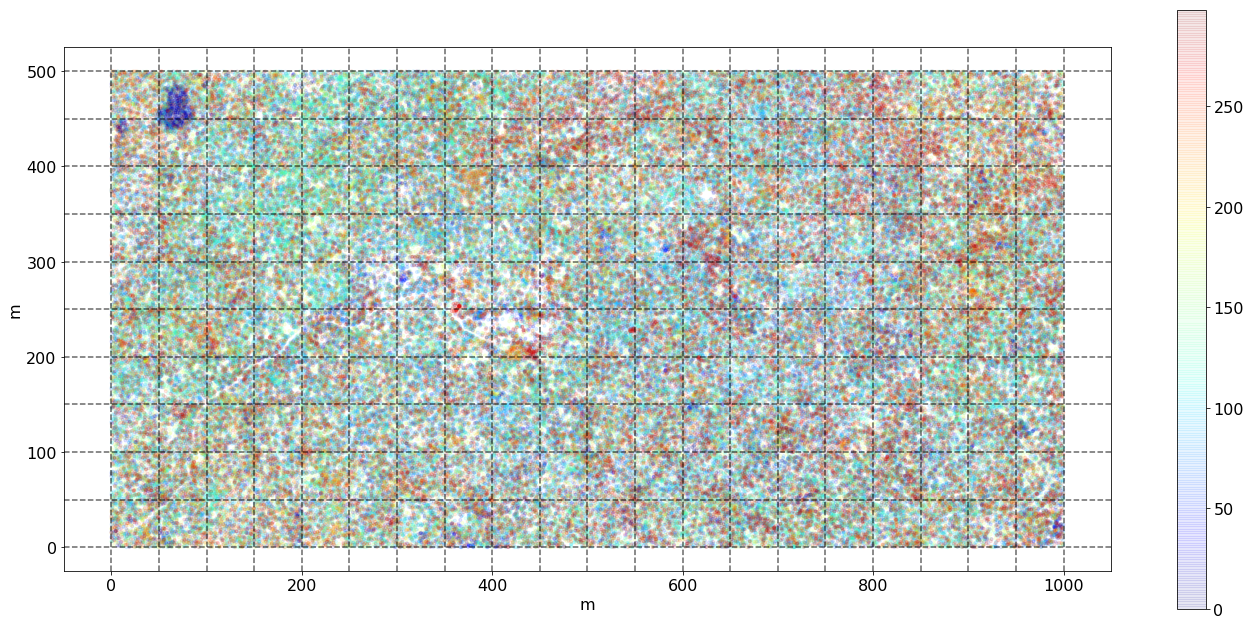

In [4]:
# plot of the species
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
species = labelencoder.fit_transform(data["sp"])
#species = species / S
fig, ax = plt.subplots(figsize=(20,10))
fig.tight_layout(pad=5)
#plt.scatter(data["gx"], data["gy"], c=species, cmap="jet", alpha=.1, marker=".")
plot = ax.scatter(data["gx"], data["gy"], c=species, cmap="jet", alpha=.1, marker=".")
cbar = fig.colorbar(plot,format='%i')
cbar.ax.tick_params(labelsize=16)
ax.set_xlabel("m", fontsize=16)
ax.set_ylabel("m", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_aspect("equal")
# add horizontal and verticla lines to show the subplots

for line in [x for x in range(0, 1001, 50)]: ax.axvline(line, 0, 1, color="black", linestyle="--", alpha=.6)
for line in [x for x in range(0,  501, 50)]: ax.axhline(line, 0, 1, color="black", linestyle="--", alpha=.6)

plt.show()
#fig.savefig("./Figure/forest.pdf")
fig.savefig("./Figure/forest.png")

In [5]:
# divide the data in 200 subplots
xdiv = [x for x in range(0, 1001, 50)]
ydiv = [x for x in range(0,  501, 50)]

subplot = []
df = pd.DataFrame()

for i in range(len(xdiv)-1):
    for j in range(len(ydiv)-1):
        df = data[data["gx"] >= xdiv[i]  ]
        df =   df[  df["gx"] <  xdiv[i+1]]
        df =   df[  df["gy"] >= ydiv[j]  ]
        df =   df[  df["gy"] <  ydiv[j+1]]
        subplot.append(df)


In [6]:
# the ij element indicates the abundance of species j in subplot i
# rows i    -> subplots
# columns j -> species
abundance_matrix = np.zeros((len(subplot), S))
for i, df in enumerate(subplot):
    for j, p in enumerate(Species):
        n = df[df["sp"] == p].shape[0]
        abundance_matrix[i,j] = n
print(abundance_matrix.shape)
abundance_matrix

(200, 299)


array([[ 0., 25.,  9., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  2.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3.,  0., ...,  0.,  0.,  0.],
       [ 0.,  6.,  0., ...,  2.,  0.,  0.]])

In [7]:
abundance_matrix.max(), abundance_matrix.min()

(548.0, 0.0)

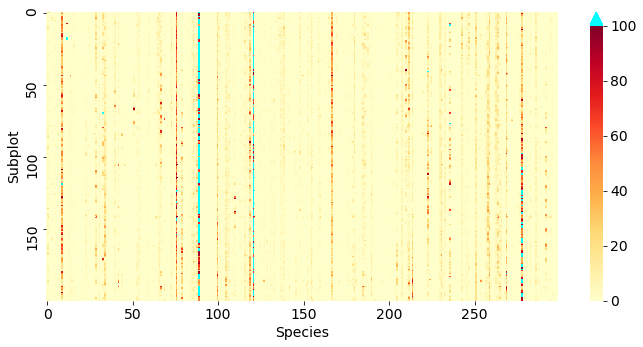

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=2.5)
cmap = plt.cm.get_cmap("YlOrRd")
cmap.set_over("cyan")
sns.heatmap(abundance_matrix, cmap=cmap, square=False, xticklabels=50, yticklabels=50, ax=ax, vmax=100, 
            cbar_kws={"extend":"max"})
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Subplot", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.savefig("./Figure/abundance_matrix.pdf")

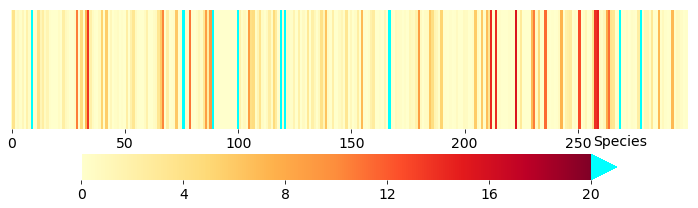

In [9]:
fig, ax = plt.subplots(figsize=(10,3))
cmap = plt.cm.get_cmap("YlOrRd")
cmap.set_over("cyan")
sns.heatmap(abundance_matrix.mean(axis=0).reshape(1,299), cmap=cmap, square=False, xticklabels=50, yticklabels=False, ax=ax, vmax=20, 
            cbar_kws={"extend":"max", "orientation":"horizontal"})
ax.tick_params(axis='both', which='major', labelsize=14)
ax.annotate("Species", xy=(.85,.3), xycoords='figure fraction', 
             fontsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/average_abundance_heatmap.pdf")

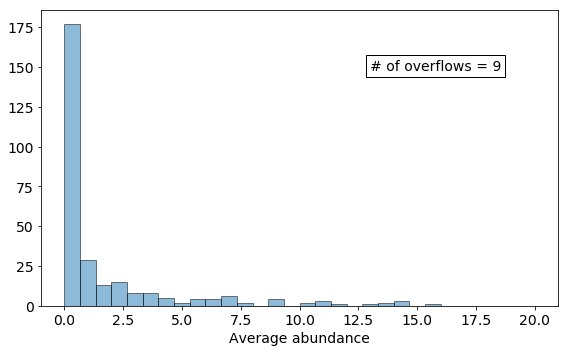

In [62]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(abundance_matrix.mean(axis=0), bins=30, range=(0,20), histtype='bar', ec='black', alpha=.5)
ax.set_xlabel("Average abundance", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_xlim(0, 20)
overflow = (abundance_matrix.mean(axis=0) > 20).sum()
ax.annotate("# of overflows = "+str(overflow), xy=(.65,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
fig.tight_layout()
fig.savefig("./Figure/average_abundance_hist.pdf")

In [11]:
presence_matrix = abundance_matrix > 0
average_presence = presence_matrix.mean(axis=0)
'''for x,y in zip(Species, average_presence):
    print(x, y)'''
print(average_presence)

[0.05  0.765 0.08  0.275 0.18  0.515 0.01  0.71  0.34  1.    0.04  0.115
 0.02  0.72  0.72  0.335 0.69  0.17  0.03  0.005 0.01  0.28  0.035 0.67
 0.5   0.215 0.025 0.01  0.07  0.86  0.005 0.945 0.025 0.825 0.985 0.77
 0.37  0.085 0.065 0.44  0.96  0.105 0.79  0.04  0.385 0.045 0.23  0.425
 0.005 0.22  0.03  0.29  0.01  0.565 0.91  0.44  0.08  0.04  0.01  0.43
 0.755 0.005 0.015 0.28  0.345 0.845 0.955 0.93  0.015 0.48  0.045 0.175
 0.265 0.93  0.02  0.305 1.    0.295 0.22  0.78  0.045 0.06  0.305 0.695
 0.405 0.85  0.99  0.855 0.98  1.    0.02  0.035 0.005 0.055 0.04  0.03
 0.015 0.105 0.025 0.035 1.    0.685 0.26  0.52  0.25  0.99  0.95  0.87
 0.245 0.69  0.775 0.3   0.005 0.33  0.785 0.315 0.915 0.865 0.09  1.
 0.33  1.    0.285 0.18  0.24  0.77  0.01  0.735 0.01  0.215 0.12  0.905
 0.025 0.73  0.59  0.095 0.33  0.96  0.62  0.985 0.38  0.095 0.595 0.02
 0.005 0.305 0.445 0.22  0.83  0.005 0.53  0.005 0.19  0.775 0.13  0.975
 0.02  0.01  0.27  0.575 0.76  0.01  0.05  0.155 0.045 0.4  

# Max Ent 1

$$\mathcal{H} = -\sum_{i=1}^S \lambda_i \sigma_i$$

$$ P(\sigma_i) = \frac{1}{Z}e^{\sum_{i=1}^S \lambda_i \sigma_i} $$

$$ Z = \sum_{\{\sigma\}}e^{\sum_{i=1}^S \lambda_i \sigma_i}  $$

$$ \langle \sigma_i \rangle = m_i = \frac{\partial \ln{Z}}{\partial \lambda_i} = \tanh{\lambda_i} \Rightarrow \lambda_i = \tanh^{-1}(m_i) $$

In [12]:
m = 2*average_presence-1
lambda_MaxEnt1 = np.arctanh(m)
#print(lambda_MaxEnt1)


D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in arctanh
  


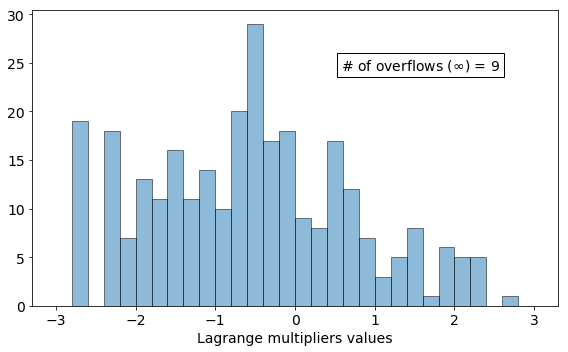

In [63]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(lambda_MaxEnt1, bins=30, range=(-3,3), histtype='bar', ec='black', alpha=.5)
overflow = (lambda_MaxEnt1 > 3).sum()
ax.annotate("# of overflows ($\\infty$) = "+str(overflow), xy=(.6,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
ax.set_xlabel("Lagrange multipliers values", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt1_Lambdas_hist.pdf")

In [14]:
# check if I get the same results if I use a Ising model like matrix
# (+1 -> presence, -1 -> absence), instead of doing the analisys
# and then appling the condotion: m = 2*average_presence-1
presence_matrix_Ising = presence_matrix.copy()
presence_matrix_Ising = presence_matrix_Ising.astype(int)
presence_matrix_Ising[presence_matrix_Ising == 0] = -1

average_presence_Ising = presence_matrix_Ising.mean(axis=0)

lambda_MaxEnt1_Ising = np.arctanh(average_presence_Ising)
np.allclose(lambda_MaxEnt1_Ising, lambda_MaxEnt1)

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in arctanh
  # Remove the CWD from sys.path while we load stuff.


True

In [15]:
def H1(Lambda, configuration):
    sigma = configuration.mean(axis=0)
    return -np.dot(Lambda, sigma)
H1(lambda_MaxEnt1_Ising, presence_matrix_Ising)

-inf

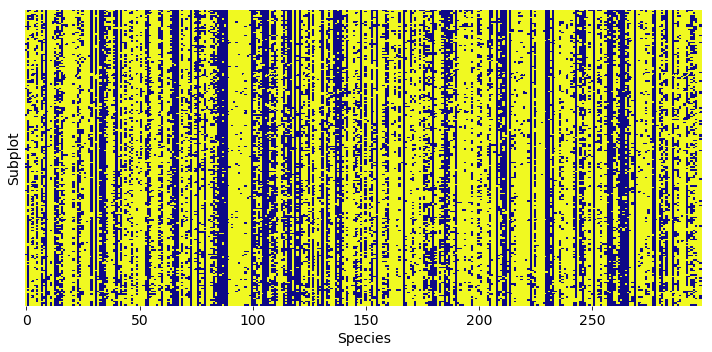

In [16]:
# blue  -> present
# yellow -> absent

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=2.5)
sns.heatmap(presence_matrix_Ising, cbar=False, cmap="plasma_r", square=False, xticklabels=50, yticklabels=False, ax=ax)
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Subplot", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
#cbar = ax.collections[0].colorbar
#cbar.ax.tick_params(labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/presence_matrix.pdf")


# Max Ent 2

$$\mathcal{H} = -\sum_{j=1}^S \lambda_j \sigma_j - \frac{k}{S}(\sum_{j=1}^S \sigma_j)^2$$

Constraints:

1. $(1-m_i)/2 = p_i \Rightarrow$ Ising-like presence matrix
2. $\langle(\sum_{j=1}^S \sigma_j)^2\rangle_{emp} = \langle(S_+ - S_-)^2\rangle_{emp}$

In [17]:
constr1_data = average_presence_Ising.copy()
constr2_data = np.mean((presence_matrix_Ising.sum(axis=1))**2)/S
print(constr2_data)

21.32829431438127


In [18]:
def H2(Lambda, k, configuration):
    first_sum  = np.dot(Lambda, configuration)
    second_sum = (k/configuration.shape[0])*(np.sum(configuration))**2
    
    return(-first_sum - second_sum)

In [19]:
np.random.seed(20190324)

def Metropolis(Lambda,k,n_steps=10000, beta=1, species=299, verbose=False):
    config = np.random.choice([-1,1], species)
    # list to save the configurations
    Configuration = [config]
    # list to save the energies
    Energy = [H2(Lambda, k, config)]
    for i in range(n_steps):
        # save initial configuration
        config_init = config.copy()
        # Calculate the energy of the initial configuration
        E_init = H2(Lambda, k, config_init)
        
        # change one element at random in the configuration
        config_final = config_init.copy()
        config_final[np.random.randint(0, species)] *= -1
        
        # Calculate the energy of the final configuration
        E_final = H2(Lambda, k, config_final)
                
        # if E_final < E_init always accept the new configuration
        # if E_final > E_init accept the new configuration with probability = exp[-beta(E_final-E_init)]
        threshold = np.exp(beta*(E_init-E_final)) #     threshold > 1 if E_final < E_init
                                                  # 0 < threshold < 1 if E_final > E_init
        # get random number in [0,1] and accept the configuration if it's lower than the threshold
        if np.random.rand() < threshold:
            config = config_final.copy()
            Configuration.append(config)
            Energy.append(E_final)
            if verbose: print("Accepted with prob", np.minimum(threshold, 1))
        else:
            config = config_init.copy()
            Configuration.append(config)
            Energy.append(E_init)
            if verbose: print("Rejected with prob", 1-threshold)
                
    return Configuration, Energy

Config: 10001
En: 10001


Text(0, 0.5, 'Energy')

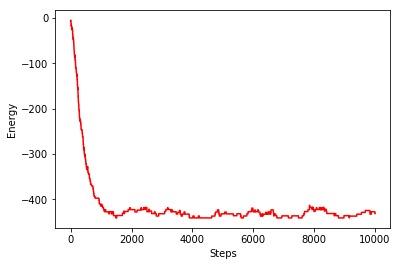

In [20]:
l = np.random.rand(len(lambda_MaxEnt1_Ising))
Config, En = Metropolis(l, k=1, n_steps=10000, beta=1)
print("Config:", len(Config))
print("En:", len(En))
plt.plot(En,color='r')
plt.xlabel("Steps")
plt.ylabel("Energy")


In [21]:
Config[-1]

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [22]:
def param_from_Metropolis(Configurations, discard_rate=.75):
    Config  = np.array(Configurations) 
    Config_ = Config[int(discard_rate*Config.shape[0]):,:] # use only the last configurations
    constr1 = Config_.mean(axis=0)
    constr2 = np.mean((Config_.sum(axis=1))**2)/Config_.shape[1]
    return constr1, constr2

In [23]:
from os.path import isfile

Lambda_list_path = "./Lambda_list.gz"
k_list_path      = "./k_list.gz"

if isfile(Lambda_list_path) and isfile(k_list_path):
    print("Lambda & k list found: loading data")
    Lambda_list = np.loadtxt(Lambda_list_path)
    k_list      = np.loadtxt(k_list_path)
else:
    print("Lambda & k list not found: creating data")
    Lambda = (np.random.rand(len(lambda_MaxEnt1_Ising))-0.5)*6
    k = 1.1
    n_iter = 10000
    eta = 1e-03
    Lambda_list = [Lambda]
    k_list = [k]
    constr1_diff = []
    constr2_diff = []
    for t in range(n_iter):
        # generate random configurations (Metropolis)
        Config, En = Metropolis(Lambda, k, n_steps=5000, beta=1)
        # get constraints from Metropolis configurations
        constr1_model, constr2_model = param_from_Metropolis(Config)
        # update parameters
        diff1 = constr1_data - constr1_model
        diff2 = constr2_data - constr2_model
        Lambda += eta*diff1
        k      += eta*diff2
        Lambda_list.append(Lambda.copy())
        k_list.append(k)
        constr1_diff.append(diff1)
        constr2_diff.append(diff2)
        if (t+1)%1000==0: 
            print("Iteration {:d}/{:d}".format(t+1, n_iter))
    print("Data created: saving file")
    Lambda_list = np.array(Lambda_list)
    k_list      = np.array(k_list)
    np.savetxt(Lambda_list_path, Lambda_list)
    np.savetxt(k_list_path, k_list)

Lambda & k list found: loading data


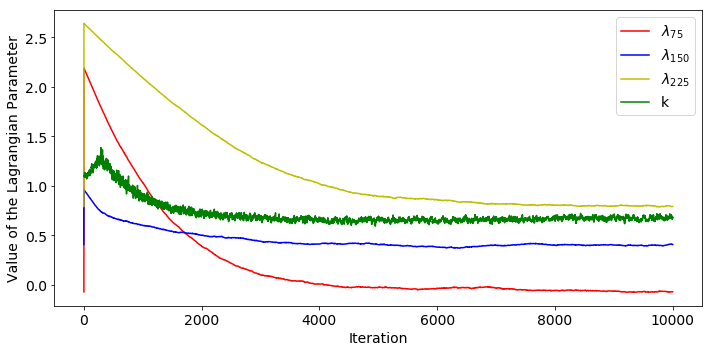

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(Lambda_list[:,  75], "r-", label="$\\lambda_{75}$")
ax.plot(Lambda_list[:, 150], "b-", label="$\\lambda_{150}$")
ax.plot(Lambda_list[:, 225], "y-", label="$\\lambda_{225}$")
ax.plot(k_list, "g-", label="k")
ax.set_xlabel("Iteration", fontsize=14)
ax.set_ylabel("Value of the Lagrangian Parameter", fontsize=14)
ax.legend(loc="best", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt2_parameters_convergence.pdf")

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


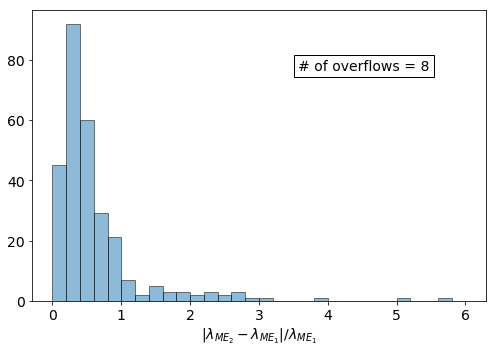

In [64]:
lambda_MaxEnt2_Ising = Lambda_list[-1].copy()
fig, ax = plt.subplots(figsize=(7,5))
perc_diff = abs((lambda_MaxEnt2_Ising-lambda_MaxEnt1_Ising)/lambda_MaxEnt1_Ising)
ax.hist(perc_diff, bins=30, range=(0,6), histtype='bar', ec='black', alpha=.5)
overflow = (perc_diff > 6).sum()
ax.annotate("# of overflows = "+str(overflow), xy=(.6,.8), xycoords='figure fraction', 
            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
ax.set_xlabel("$|\\lambda_{ME_2} - \\lambda_{ME_1}|/\\lambda_{ME_1}$", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt1-2_Lambdas_diff_hist.pdf")

In [27]:
print("k =", k_list)
print("lambda =\n", lambda_MaxEnt2_Ising)

k = [1.1        1.09573448 1.0927278  ... 0.68255884 0.67171166 0.67979321]
lambda =
 [-1.21262088  0.95428479 -0.85244391 -0.16000445 -0.38956791  0.3779555
 -1.34915134  0.79434146 -0.00357914  2.04307926 -1.09388439 -0.68076652
 -1.26449218  0.83477568  0.83420328  0.01122131  0.748337   -0.52142818
 -2.37050529 -1.44162698 -1.31392735 -0.12575871 -1.43455879  0.70878926
  0.35421458 -0.32738417 -1.23187173 -1.55854022 -1.25767123  1.26374855
 -2.45145507  1.72571829 -1.24240512  1.10981744  2.0476114   0.94987262
  0.08872648 -0.83006612 -1.31502539  0.21441629  1.80460021 -0.72208596
  1.00605631 -2.02988932  0.12204082 -1.0626864  -0.25211059  0.21382338
 -2.01238578 -0.31719602 -1.17015972 -0.1113038  -2.4154459   0.49216426
  1.52955283  0.22956294 -0.89681043 -1.19066955 -1.35688182  0.19209891
  0.91453576 -1.51185486 -1.96937745 -0.12400813  0.02002393  1.19788793
  1.82861601  1.68825253 -1.31082763  0.31769128 -1.06649619 -0.44436411
 -0.16028432  1.5962141  -1.25350306 -0

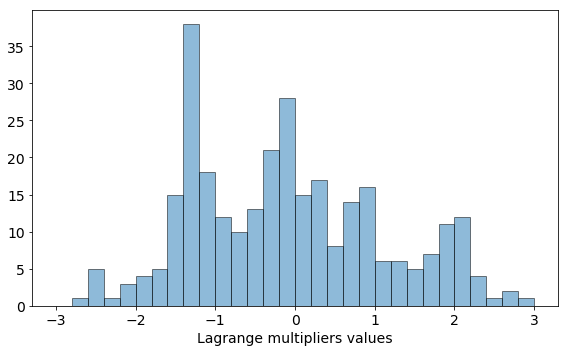

In [61]:
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(lambda_MaxEnt2_Ising, bins=30, range=(-3,3), histtype='bar', ec='black', alpha=.5)
overflow = (lambda_MaxEnt2_Ising > 3).sum()
#ax.annotate("# of overflows ($\\infty$) = "+str(overflow), xy=(.6,.8), xycoords='figure fraction', 
#            bbox={"boxstyle":"square", "fc":"w"}, fontsize=14)
ax.set_xlabel("Lagrange multipliers values", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
fig.tight_layout()
fig.savefig("./Figure/MaxEnt2_Lambdas_hist.pdf")

# Max Ent 3

In [29]:
average_abundance = abundance_matrix.mean(axis=0)
std_abundance     = abundance_matrix.std(axis=0)
sel = average_abundance-std_abundance > 0
selection = abundance_matrix.copy()
selection = selection[:,sel]
cov = np.cov(selection, rowvar=False)
M = np.linalg.inv(cov)
M_zero_diag = M.copy()
np.fill_diagonal(M_zero_diag, 0)


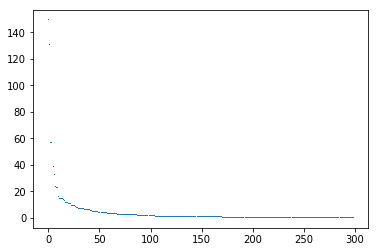

In [30]:
plt.plot(np.flip(np.sort(average_abundance)), ",")

-0.09312026178109133 1.0970152032953804


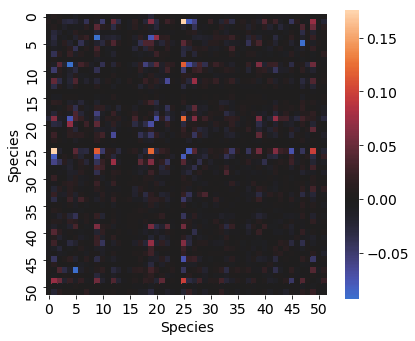

In [31]:
fig, ax = plt.subplots(figsize=(6,5))
fig.tight_layout(pad=2.5)
#cmap = plt.cm.get_cmap("YlOrRd")
#cmap.set_over("cyan")
sns.heatmap(M_zero_diag, center=0, square=True, xticklabels=5, yticklabels=5, ax=ax)
ax.set_xlabel("Species", fontsize=14)
ax.set_ylabel("Species", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
fig.savefig("./Figure/MaxEnt3_M_matrix.pdf")
print(M.min(), M.max())

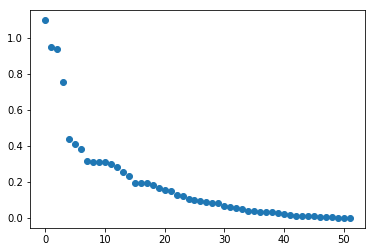

In [32]:
diag = M.diagonal()
diag = np.flip(np.sort(diag))
plt.plot(diag, "o")

(-0.2, 0.2)

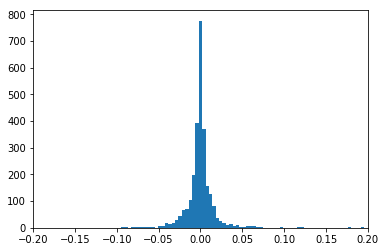

In [33]:
plt.hist(M.reshape(M.shape[0]*M.shape[1],1), bins=np.linspace(-.2,.2,100))
plt.xlim(-.2,.2)

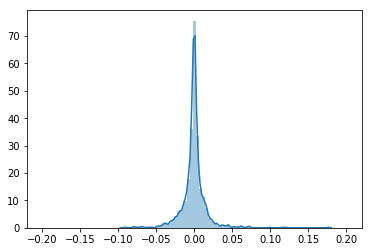

In [60]:
sns.distplot(M_zero_diag.reshape(M_zero_diag.shape[0]*M_zero_diag.shape[1],1), bins=np.linspace(-.2,.2,100))
#plt.xlim(-.1,.1)

In [36]:
lambda_MaxEnt3 = -np.dot(M, average_abundance[sel])
lambda_MaxEnt3

array([-4.83264797e-02, -1.16486070e+00, -2.93478529e-01, -3.11328000e-01,
       -3.66855711e-01, -1.07044286e-01, -3.01679453e-01, -1.63703924e-01,
       -1.73817090e-01, -9.70142202e-01,  3.49753298e-01,  3.54322694e-01,
       -6.89061916e-01,  4.13549615e-01, -1.03968491e-01, -3.21059683e-01,
       -5.60400020e-01, -8.49591230e-01, -5.25008504e-01, -1.12937430e+00,
       -6.70060527e-01, -5.33879178e-01, -2.37290542e-01, -2.87360127e-01,
       -4.33141090e-02, -1.96174052e+00,  3.47173808e-01, -4.27117072e-01,
        3.78209328e-01,  1.44537751e-01, -3.08590561e-01, -1.47285523e+00,
       -1.36667803e-03, -2.92927106e-02, -9.75952730e-01,  1.03818094e-01,
       -2.63891799e-01,  6.35529827e-02, -3.14243271e-01,  8.30471696e-02,
        2.37977688e-01, -5.95514036e-02, -3.67265304e-01, -3.19391612e-01,
       -4.46038392e-01, -4.19277073e-01, -2.19594166e-02, -4.22997646e-01,
       -1.44019814e-01, -1.06379959e+00, -1.43674020e-02, -1.91712012e-01])

# Graph

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


1

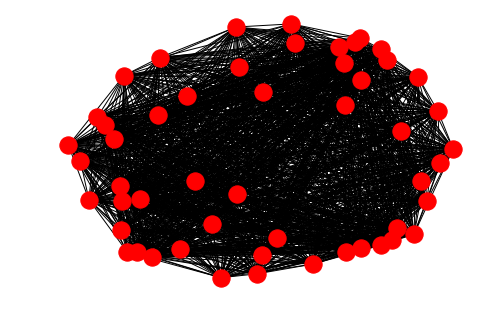

In [37]:
import networkx as nx
g = nx.from_numpy_matrix(M)
nx.draw(g)
nx.number_connected_components(g)

In [38]:
Theta = np.linspace(M.min(), 0.4, 100)
Theta = np.append(Theta, np.linspace(0, .05, 1000))
Theta.sort()
theta_star, idx = None, None
n_comp = []
index = 0
for index, theta in enumerate(Theta):
    Mt = M_zero_diag.copy()
    Mt[Mt < theta] = 0
    g = nx.from_numpy_matrix(Mt)
    '''if index<10: 
        nx.draw_networkx(g)
        plt.show()'''
    n_comp.append(nx.number_connected_components(g))
    index+=1
    if theta_star == None and nx.is_connected(g)==False: 
        theta_star = Theta[index-1]
        idx = index-1
theta_star, idx

(0.0027527527527527527, 75)

Text(0.5, 0, '$\\theta$')

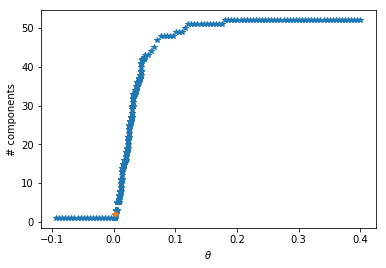

In [66]:
plt.plot(Theta, n_comp, "*", )
plt.plot(theta_star, n_comp[idx], "*")
plt.ylabel("# components")
plt.xlabel("$\\theta$")
#plt.ylim(0, 10)
#plt.xlim(-0.1, 0.1)

D:\Miniconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


1

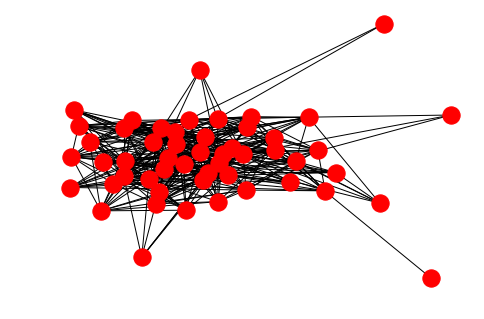

In [40]:
Mt = M_zero_diag.copy()
Mt[Mt < Theta[idx-1]] = 0
g = nx.from_numpy_matrix(Mt)
nx.draw(g)
nx.number_connected_components(g)

In [53]:
Mt = M_zero_diag.copy()
Mt[Mt < Theta[idx-1]] = 0
g = nx.from_numpy_matrix(Mt)

pathlengths = []

print("source vertex {target:length, }")
for v in g.nodes():
    spl = dict(nx.single_source_shortest_path_length(g, v))
    #print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])

print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))

# histogram of path lengths
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))

print("radius: %d" % nx.radius(g))
print("diameter: %d" % nx.diameter(g))
print("eccentricity: %s" % nx.eccentricity(g))
print("center: %s" % nx.center(g))
print("periphery: %s" % nx.periphery(g))
print("density: %s" % nx.density(g))

print("clustering: %s" % nx.clustering(g))
print("clustering average: %s" % nx.average_clustering(g))


source vertex {target:length, }

average shortest path length 1.7337278106508875

length #paths
0 52
1 782
2 1704
3 166
radius: 2
diameter: 3
eccentricity: {0: 3, 1: 3, 2: 3, 3: 3, 4: 2, 5: 3, 6: 2, 7: 2, 8: 3, 9: 2, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 15: 3, 16: 3, 17: 3, 18: 3, 19: 3, 20: 3, 21: 3, 22: 2, 23: 3, 24: 3, 25: 3, 26: 2, 27: 3, 28: 2, 29: 3, 30: 3, 31: 3, 32: 3, 33: 3, 34: 3, 35: 3, 36: 3, 37: 3, 38: 3, 39: 2, 40: 3, 41: 3, 42: 3, 43: 3, 44: 3, 45: 3, 46: 3, 47: 2, 48: 3, 49: 3, 50: 3, 51: 3}
center: [4, 6, 7, 9, 22, 26, 28, 39, 47]
periphery: [0, 1, 2, 3, 5, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51]
density: 0.2948717948717949
clustering: {0: 0.4, 1: 0.34210526315789475, 2: 0.38235294117647056, 3: 0.4393939393939394, 4: 0.3660130718954248, 5: 0.3508771929824561, 6: 0.425, 7: 0.4583333333333333, 8: 0.7333333333333333, 9: 0.2924901185770751, 10: 0.42857142857142855, 

(array([ 3.,  1.,  3.,  4.,  7.,  4., 16.,  7.,  4.,  3.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <a list of 10 Patch objects>)

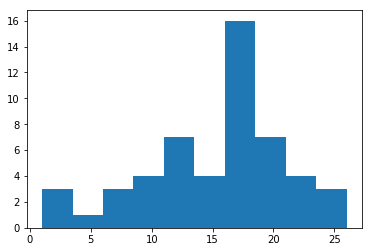

In [49]:
# node degree
node_deg = g.degree()
node_deg = list(node_deg)
deg = [x[1] for x in node_deg]
plt.hist(deg)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2., 10.,  7., 12.,
         4.,  6.,  2.,  3.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

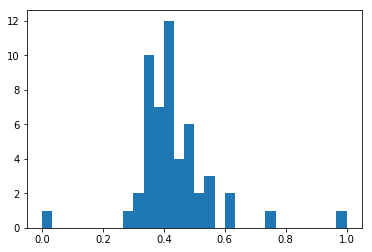

In [50]:
# cluster coefficients
cluster_coeff = nx.clustering(g)
plt.hist(cluster_coeff.values(), bins=30)

In [51]:
# degree assortativity
deg_ass = nx.degree_assortativity_coefficient(g)
deg_ass_pers = nx.degree_pearson_correlation_coefficient(g)
print(deg_ass, deg_ass_pers)

-0.18160397243045948 -0.18160397243046136


(array([10.,  4.,  6.,  9.,  3.,  4.,  4.,  1.,  1.,  1.,  2.,  1.,  0.,
         3.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([0.        , 0.00288798, 0.00577596, 0.00866394, 0.01155192,
        0.0144399 , 0.01732788, 0.02021586, 0.02310384, 0.02599182,
        0.0288798 , 0.03176778, 0.03465576, 0.03754374, 0.04043172,
        0.0433197 , 0.04620768, 0.04909566, 0.05198364, 0.05487162,
        0.0577596 ]),
 <a list of 20 Patch objects>)

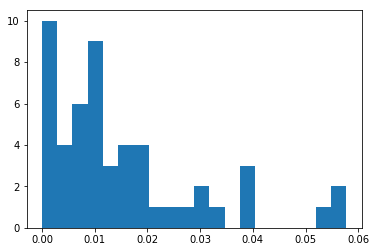

In [52]:
# betweenness centrality
bet_centr = nx.betweenness_centrality(g)
plt.hist(bet_centr.values(), bins=20)